In [1]:
import numpy as np
from pathlib import Path
import spotipy
import json
from pprint import pprint
from IPython.display import display

import dill

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')

import lib_spotify_app as lib

import pandas as pd

pd.set_option('max_columns', None)
pd.reset_option('max_rows')

from typing import Dict, List, Union

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.spatial.distance import yule

from scipy.cluster.hierarchy import fcluster, dendrogram, linkage


In [2]:
df_likedsong = pd.read_csv(Path('private', 'likedsongs.csv'))

Text(0.5, 1.0, 'How many songs I liked per day')

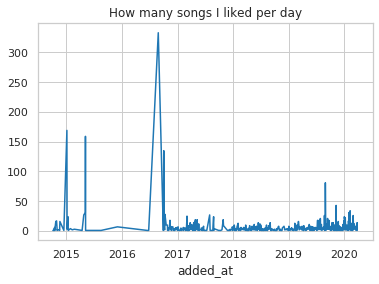

In [3]:
df_likedsong['added_at'] = pd.to_datetime(df_likedsong['added_at'])
# plot the amount of time I added a song

df_likedsong['added_at']\
            .groupby(by=df_likedsong['added_at'].dt.date)\
            .count()\
            .plot()\
            .set_title('How many songs I liked per day')


In [6]:
sp_adapter = lib.spotipyapi(
    credential_fp=Path(r'private/spotify_credential.json'),
    scope=' '.join(['user-library-read','user-top-read',]),
    cache_path=Path(r'private')
)

sp_adapter.open_session()


In [7]:

genre_likedsong = lib.EnrichArtistGenre(
    df_likedsong['track.artists.0.id'],
    sp=sp_adapter.sp
)


In [8]:

genre_likedsong.df_genre = genre_likedsong._df_genre_raw
genre_likedsong.clean_useless_genre()
pprint(genre_likedsong._genre_cleaned.to_list())
pprint(genre_likedsong.genre.to_list())


['african rock',
 'albany ny indie',
 'american contemporary classical',
 'american metalcore',
 'american post-rock',
 'american shoegaze',
 'argentine rock',
 'atlanta indie',
 'australian alternative rock',
 'australian dance',
 'australian electropop',
 'australian garage punk',
 'australian hip hop',
 'australian house',
 'australian indie',
 'australian indie folk',
 'australian indie rock',
 'australian metal',
 'australian pop',
 'australian post-rock',
 'australian psych',
 'australian rock',
 'australian shoegaze',
 'austrian pop',
 'austrian stoner rock',
 'baltic classical',
 'baltimore indie',
 'belfast indie',
 'belgian black metal',
 'belgian contemporary classical',
 'belgian indie',
 'belgian indie rock',
 'belgian metal',
 'belgian rock',
 'belgian stoner rock',
 'birmingham indie',
 'birmingham metal',
 'boston hardcore',
 'boston hip hop',
 'boston indie',
 'boston metal',
 'boston punk',
 'boston rock',
 'brazilian stoner rock',
 'brazilian techno',
 'british alter

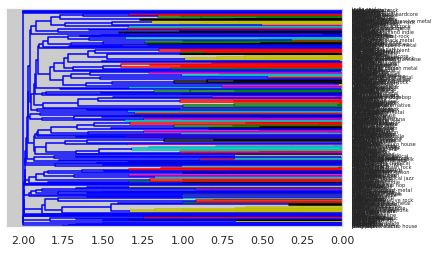

In [9]:

genre_likedsong.cluster_genre_fit(method='average')

# genre_likedsong.plot_clustermap()
genre_likedsong.plot_dendrogram()


distance optimal is 1.9505428796454287
there is 35 supergenres


outliers                     era  \
0           adelaide indie                 baroque   
1    alternative americana               classical   
2          asheville indie           classical era   
3               avant-rock  early modern classical   
4                 balearic             early music   
..                     ...                     ...   
233                    NaN                     NaN   
234                    NaN                     NaN   
235                    NaN                     NaN   
236                    NaN                     NaN   
237                    NaN                     NaN   

    metal_roll_wave_new_'n'_of_black_speed               j  \
0                           black 'n' roll           anime   
1                  new wave of speed metal     anime score   
2                                      NaN        chiptune   
3                                      NaN  classic j-rock   
4                                      NaN   final fantasy   
..                                     ...             ...   
233                                    NaN             NaN   
234                                    NaN             NaN   
235                                    NaN             NaN   
236                                    NaN             NaN   
237                                    NaN             NaN   

                        chanson              jazz           jazz  \
0                       chanson   adult standards         ambeat   
1    nouvelle chanson francaise  avant-garde jazz       chillhop   
2      rock alternatif francais             bebop      j-ambient   
3                           NaN          big band  jazz boom bap   
4                           NaN        bossa nova       jazz rap   
..                          ...               ...            ...   
233                         NaN               NaN            NaN   
234                         NaN               NaN            NaN   
235                         NaN               NaN            NaN   
236                         NaN               NaN            NaN   
237                         NaN               NaN            NaN   

    meme_trap_dark_rap_phonk          hop_hip_rap   house_electro  \
0                  dark trap     abstract hip hop       darksynth   
1                   meme rap  alternative hip hop  destroy techno   
2                      phonk      alternative r&b         electro   
3                        NaN          atl hip hop    fidget house   
4                        NaN             bassline    filter house   
..                       ...                  ...             ...   
233                      NaN                  NaN             NaN   
234                      NaN                  NaN             NaN   
235                      NaN                  NaN             NaN   
236                      NaN                  NaN             NaN   
237                      NaN                  NaN             NaN   

             house            wave                 indie             techno  \
0       afro house  dark post-punk         bristol indie  avant-garde metal   
1    aussietronica          glitch  cambridgeshire indie           big beat   
2       bass house      glitch hop    english indie rock         braindance   
3        bass trap      grave wave         glasgow indie          breakbeat   
4      bedroom pop       italogaze       liverpool indie          breakcore   
..             ...             ...                   ...                ...   
233            NaN             NaN                   NaN                NaN   
234            NaN             NaN                   NaN                NaN   
235            NaN             NaN                   NaN                NaN   
236            NaN             NaN                   NaN                NaN   
237            NaN             NaN                   NaN                NaN   

                       metal 

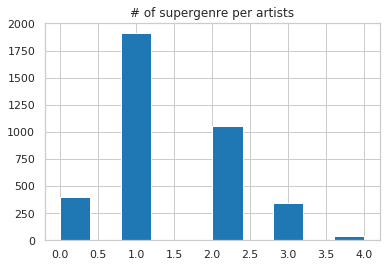

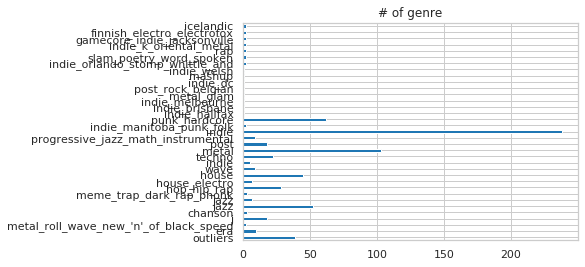

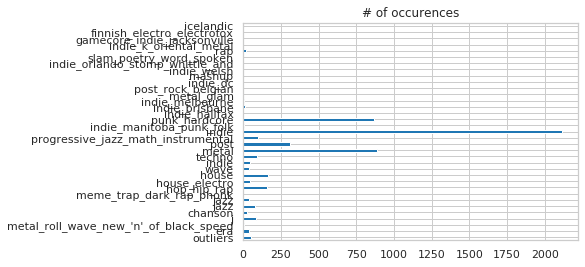

In [10]:

genre_likedsong.cluster_genre_transform_auto(verbose=True)


In [12]:
df_likedsong_enrich = genre_likedsong.enrich_df(df_likedsong)
display(df_likedsong_enrich.sample(20))


Unnamed: 0  index                  added_at track.album.album_type  \
985          982      0 2016-10-02 15:46:12+00:00                  album   
1523        1519      0 2017-07-31 17:42:42+00:00                  album   
1219        1215      0 2017-03-04 15:36:09+00:00                  album   
1560        1556      0 2017-10-28 22:13:44+00:00                  album   
3629        3625      0 2020-03-01 19:12:59+00:00                 single   
294          293      0 2015-01-11 23:17:16+00:00                  album   
2252        2248      0 2019-03-18 13:40:53+00:00                 single   
1074        1071      0 2016-11-12 18:44:33+00:00                  album   
2562        2558      0 2019-08-19 12:05:35+00:00                  album   
693          691      0 2016-08-27 03:11:04+00:00                  album   
991          988      0 2016-10-02 15:46:12+00:00                  album   
2002        1998      0 2018-08-31 21:59:11+00:00                  album   
2139        2135      0 2018-10-28 22:14:28+00:00                  album   
624          622      0 2016-08-27 03:11:04+00:00                  album   
2507        2503      0 2019-07-29 21:00:18+00:00                  album   
1652        1648      0 2018-02-27 01:04:50+00:00                  album   
1556        1552      0 2017-10-30 01:36:48+00:00                  album   
1421        1417      0 2017-05-10 22:31:00+00:00                  album   
1436        1432      0 2017-05-10 20:30:51+00:00                  album   
1089        1086      0 2016-11-12 18:44:33+00:00                  album   

            track.album.artists.0.external_urls.spotify  \
985   https://open.spotify.com/artist/7qKMNwlACMZOUd...   
1523  https://open.spotify.com/artist/6XyY86QOPPrYVG...   
1219  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1560  https://open.spotify.com/artist/0QJKELJZZuLAjq...   
3629  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
294   https://open.spotify.com/artist/36QJpDe2go2Kga...   
2252  https://open.spotify.com/artist/0bxo4CrCrmhdgf...   
1074  https://open.spotify.com/artist/6wBUn8gMP85n8d...   
2562  https://open.spotify.com/artist/4L1CfX9Kl0x9VC...   
693   https://open.spotify.com/artist/5NXHXK6hOCotCF...   
991   https://open.spotify.com/artist/5E2rtn57BM2WPj...   
2002  https://open.spotify.com/artist/7dGJo4pcD2V6oG...   
2139  https://open.spotify.com/artist/2HDhwOG3DlFskJ...   
624   https://open.spotify.com/artist/3HJIB8sYPyxrFG...   
2507  https://open.spotify.com/artist/4piFCokRN13muT...   
1652  https://open.spotify.com/artist/4PSVYeo0dqy133...   
1556  https://open.spotify.com/artist/7qKMNwlACMZOUd...   
1421  https://open.spotify.com/artist/5E2rtn57BM2WPj...   
1436  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1089  https://open.spotify.com/artist/6wBUn8gMP85n8d...   

                             track.album.artists.0.href  \
985   https://api.spotify.com/v1/artists/7qKMNwlACMZ...   
1523  https://api.spotify.com/v1/artists/6XyY86QOPPr...   
1219  https://api.spotify.com/v1/artists/3AA28KZvwAU...   
1560  https://api.spotify.com/v1/artists/0QJKELJZZuL...   
3629  https://api.spotify.com/v1/artists/3AA28KZvwAU...   
294   https://api.spotify.com/v1/artists/36QJpDe2go2...   
2252  https://api.spotify.com/v1/artists/0bxo4CrCrmh...   
1074  https://api.spotify.com/v1/artists/6wBUn8gMP85...   
2562  https://api.spotify.com/v1/artists/4L1CfX9Kl0x...   
693   https://api.spotify.com/v1/artists/5NXHXK6hOCo...   
991   https://api.spotify.com/v1/artists/5E2rtn57BM2...   
2002  https://api.spotify.com/v1/artists/7dGJo4pcD2V...   
2139  https://api.spotify.com/v1/artists/2HDhwOG3DlF...   
624   https://api.spotify.com/v1/artists/3HJIB8sYPyx...   
2507  https://api.spotify.com/v1/artists/4piFCokRN13...   
1652  https://api.spotify.com/v1/artists/4PSVYeo0dqy...   
1556  https://api.spotify.com/v1/artists/7qKMNwlACMZ...   
1421  https://api.spotify.com/v1/artists/5E2rtn57BM2...   
1436  https://api.spotify.com/v1/artists/3AA28KZ

In [13]:

df_likedsong_enrich.to_csv(Path('private', 'likedsongs_enrich.csv'))


In [17]:

df = df_likedsong_enrich[[
    'added_at',
    'track.album.id',
    'track.album.images.0.height',
    'track.album.images.0.url',
    'track.album.images.0.width',
    'track.album.name',
    'track.album.release_date',
    'track.album.release_date_precision',
    'track.album.total_tracks',
    'track.artists.0.id',
    'track.artists.0.name',
    'track.duration_ms',
    'track.id',
    'track.external_urls.spotify',
    'track.name',
    'track.popularity',
    'track.preview_url',
    'track.id.danceability',
    'track.id.energy',
    'track.id.key',
    'track.id.loudness',
    'track.id.mode',
    'track.id.speechiness',
    'track.id.acousticness',
    'track.id.instrumentalness',
    'track.id.liveness',
    'track.id.valence',
    'track.id.tempo',
    'track.id.time_signature',
    'track.artists.0.genres',
    'track.artists.0.supergenres'
]]

df.to_csv(Path('private', 'df_analysis.csv'))


In [19]:

# From now on I will plot the data
import plotly.graph_objects as go




In [20]:
df


added_at          track.album.id  \
0    2014-10-28 13:19:51+00:00  2hhnkKQp2zvG4UAvpasq4h   
0    2014-10-28 13:19:51+00:00  2hhnkKQp2zvG4UAvpasq4h   
0    2014-10-28 13:19:51+00:00  2hhnkKQp2zvG4UAvpasq4h   
0    2014-10-28 13:19:51+00:00  2hhnkKQp2zvG4UAvpasq4h   
0    2014-10-28 13:19:51+00:00  2hhnkKQp2zvG4UAvpasq4h   
...                        ...                     ...   
3749 2020-03-18 13:08:07+00:00  6BY02xu0Ic9VMPITlO5JWe   
3749 2020-03-18 13:08:07+00:00  6BY02xu0Ic9VMPITlO5JWe   
3749 2020-03-18 13:08:07+00:00  6BY02xu0Ic9VMPITlO5JWe   
3750 2020-03-18 13:00:20+00:00  4Qe5TvCjMQmX0gjjYwtARt   
3750 2020-03-18 13:00:20+00:00  4Qe5TvCjMQmX0gjjYwtARt   

      track.album.images.0.height  \
0                           640.0   
0                           640.0   
0                           640.0   
0                           640.0   
0                           640.0   
...                           ...   
3749                        640.0   
3749                        640.0   
3749                        640.0   
3750                        640.0   
3750                        640.0   

                               track.album.images.0.url  \
0     https://i.scdn.co/image/ab67616d0000b273797c32...   
0     https://i.scdn.co/image/ab67616d0000b273797c32...   
0     https://i.scdn.co/image/ab67616d0000b273797c32...   
0     https://i.scdn.co/image/ab67616d0000b273797c32...   
0     https://i.scdn.co/image/ab67616d0000b273797c32...   
...                                                 ...   
3749  https://i.scdn.co/image/ab67616d0000b273d9b0a8...   
3749  https://i.scdn.co/image/ab67616d0000b273d9b0a8...   
3749  https://i.scdn.co/image/ab67616d0000b273d9b0a8...   
3750  https://i.scdn.co/image/ab67616d0000b2735a7108...   
3750  https://i.scdn.co/image/ab67616d0000b2735a7108...   

      track.album.images.0.width  \
0                          640.0   
0                          640.0   
0                          640.0   
0                          640.0   
0                          640.0   
...                          ...   
3749                       640.0   
3749                       640.0   
3749                       640.0   
3750                       640.0   
3750                       640.0   

                                       track.album.name  \
0     The Best Of Pink Floyd: A Foot In The Door (20...   
0     The Best Of Pink Floyd: A Foot In The Door (20...   
0     The Best Of Pink Floyd: A Foot In The Door (20...   
0     The Best Of Pink Floyd: A Foot In The Door (20...   
0     The Best Of Pink Floyd: A Foot In The Door (20...   
...                                                 ...   
3749                                   RINGO DEATHSTARR   
3749                                   RINGO DEATHSTARR   
3749                                   RINGO DEATHSTARR   
3750            I Was Trying to Describe You to Someone   
3750            I Was Trying to Describe You to Someone   

     track.album.release_date track.album.release_date_precision  \
0                  2011-11-07                                day   
0                  2011-11-07                                day   
0                  2011-11-07                                day   
0                  2011-11-07                                day   
0                  2011-11-07                                day   
...                       ...                                ...   
3749               2020-02-05                                day   
3749               2020-02-05                                day   
3749               2020-02-05                                day   
3750               2020-02-07                                day   
3750               2020-02-07                                day   

      track.album.total_tracks      track.artists.0.id track.artists.0.name  \
0                           16  0k17h0D3J5VfsdmQ1iZtE9           Pink Floyd   
0                           16  0k17h0D3J5VfsdmQ1iZtE9

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19e2db6e10>,
      dtype=object)

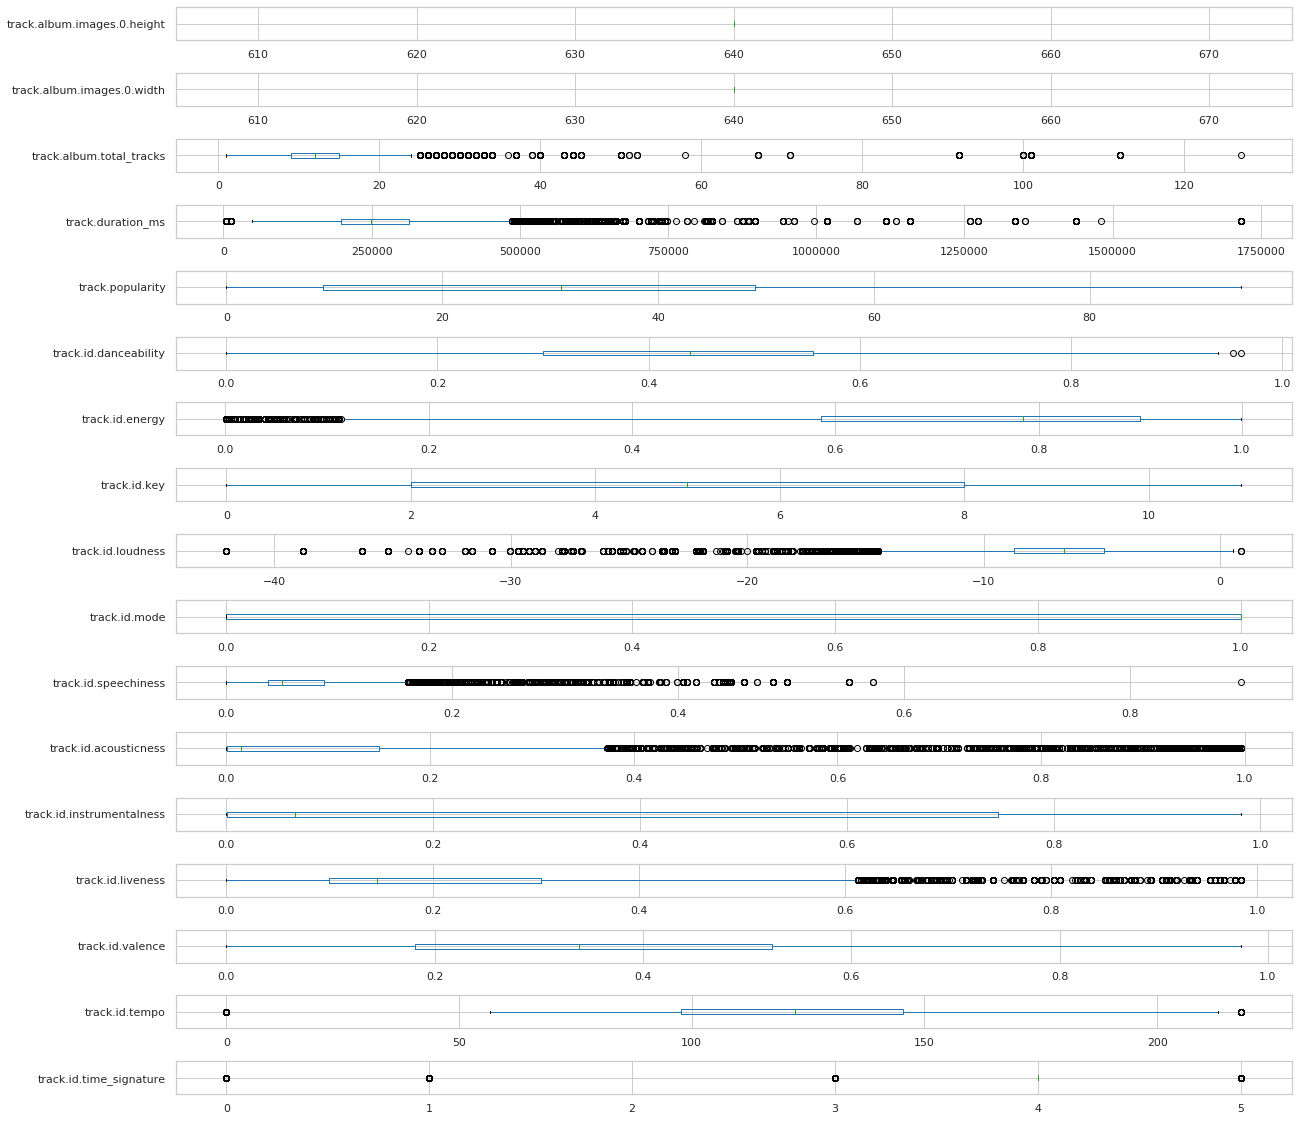

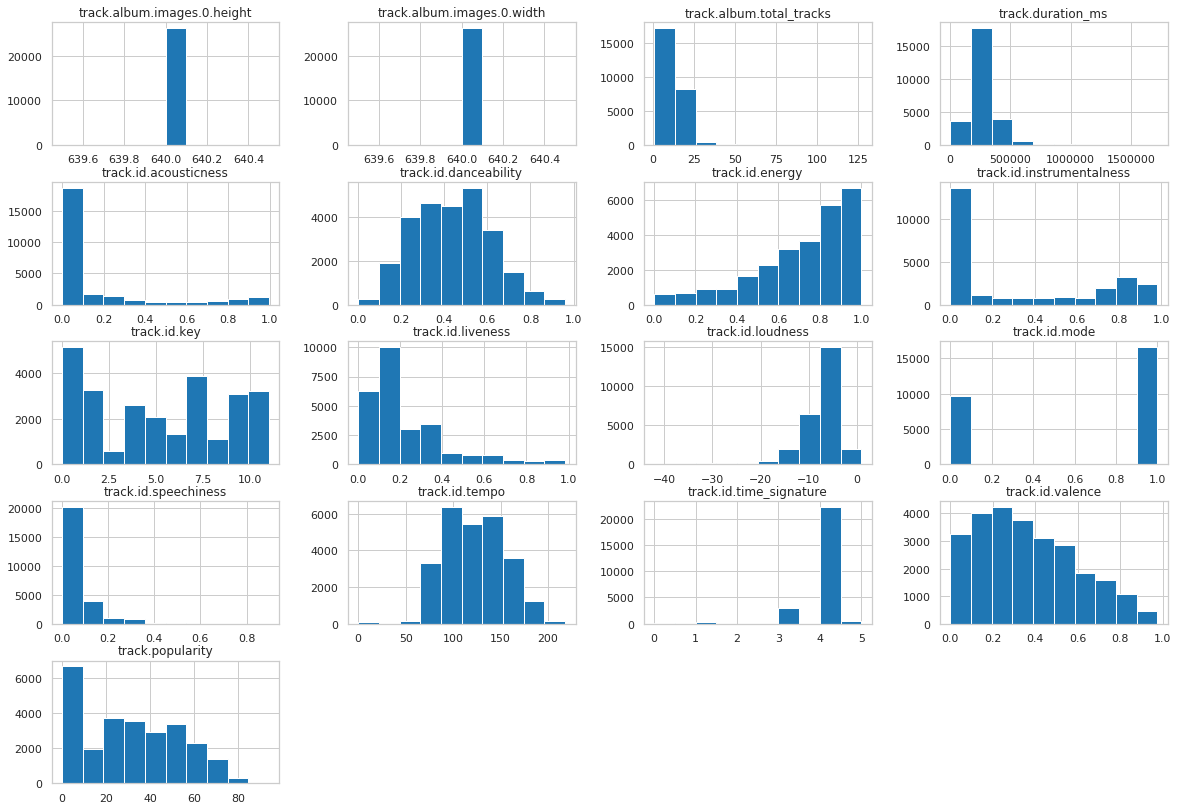

In [64]:

df_num = df.select_dtypes('number')

fig, ax = plt.subplots(df_num.shape[1], 1,
                        figsize=(20, 20),
                        gridspec_kw={'hspace': 1})
for k, col in enumerate(df_num):
    df_num.boxplot(column=col, vert=False, ax=ax[k])

df_num.hist(figsize=(20,14))
